## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# copying path and importing data frame

path = r'C:\Users\Hp\Documents\Python project p\dsc-phase-1-project-v3\data\Aviation_Data.csv'
aviation_df = pd.read_csv(path)

c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:

# checking the structure of the dataframe

aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
aviation_df.shape

(90348, 31)

In [5]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
# cheking the missing values in our aviation dataframe

aviation_df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [7]:
# Dropping columns with more than (50%) missing values

threshold = len(aviation_df) * 0.5
aviation_df = aviation_df.dropna(thresh=threshold, axis=1)

In [8]:
#Filling Numerical values with the mean
aviation_df['Number.of.Engines'].fillna(aviation_df['Number.of.Engines'].mean(), inplace = True)
aviation_df['Total.Fatal.Injuries'].fillna(aviation_df['Total.Fatal.Injuries'].mean(), inplace = True)
aviation_df['Total.Serious.Injuries'].fillna(aviation_df['Total.Serious.Injuries'].mean(), inplace = True)
aviation_df['Total.Minor.Injuries'].fillna(aviation_df['Total.Minor.Injuries'].mean(), inplace = True)
aviation_df['Total.Uninjured'].fillna(aviation_df['Total.Uninjured'].mean(), inplace = True)


In [9]:
#Filling Categorical missing values with a placeholder.(NaN)
categorical_columns = ['Investigation.Type', 'Location', 'Country', 'Airport.Code', 'Airport.Name',
                       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
                       'Amateur.Built', 'Engine.Type', 'FAR.Description', 'Schedule', 
                       'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 
                       'Report.Status']
for col in categorical_columns:
    if col in aviation_df.columns:
        aviation_df[col] = aviation_df[col].fillna('NaN')

In [10]:
aviation_df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                      0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Registration.Number        2776
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          16689
dtype: int64

In [11]:
#Changing Date columns to datetime format and filling missing values with  a placeholder.
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], errors='coerce').fillna(pd.Timestamp('1900-01-01'))
aviation_df['Publication.Date'] = pd.to_datetime(aviation_df['Publication.Date'], errors='coerce').fillna(pd.Timestamp('1900-01-01'))

In [12]:
aviation_df.isna().sum()

Event.Id                  1459
Investigation.Type           0
Accident.Number           1459
Event.Date                   0
Location                     0
Country                      0
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Registration.Number       2776
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64

In [14]:
selected_columns = [
                   
                     'Investigation.Type',           
                     'Event.Date',                  
                     'Location',                    
                     'Country',                    
                     'Airport.Code',                
                     'Airport.Name',                 
                     'Injury.Severity',              
                     'Aircraft.damage',                     
                     'Make',                         
                     'Model',                        
                     'Amateur.Built',                
                     'Number.of.Engines',            
                     'Engine.Type',                  
                     'Purpose.of.flight',           
                     'Total.Fatal.Injuries',         
                     'Total.Serious.Injuries',       
                     'Total.Minor.Injuries',         
                     'Total.Uninjured',              
                     'Weather.Condition',            
                     'Broad.phase.of.flight',        
                     'Report.Status',                
                     'Publication.Date',  
]
selected_columns

['Investigation.Type',
 'Event.Date',
 'Location',
 'Country',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [15]:
aviation_df_2 = aviation_df[selected_columns]
aviation_df_2

,Investigation.Type,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,Stinson,108-3,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,1900-01-01
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,Piper,PA24-180,...,Reciprocating,Personal,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,1996-09-19
2,Accident,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,Cessna,172M,...,Reciprocating,Personal,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,2007-02-26
3,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,Rockwell,112,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,2000-12-09
4,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,Cessna,501,...,NaN,Personal,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,1980-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,PIPER,PA-28-151,...,NaN,Personal,0.0,1.000000,0.000000,0.00000,NaN,NaN,NaN,2022-12-29
90344,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,BELLANCA,7ECA,...,NaN,NaN,0.0,0.000000,0.000000,0.00000,NaN,NaN,NaN,1900-01-01
90345,Accident,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,NaN,Personal,0.0,0.000000,0.000000,1.00000,VMC,NaN,NaN,2022-12-27
90346,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,CESSNA,210N,...,NaN,Personal,0.0,0.000000,0.000000,0.00000,NaN,NaN,NaN,1900-01-01


In [16]:
aviation_df_2.isna().sum()

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [17]:
aviation_df_2.shape

(90348, 22)

In [18]:
aviation_df_2.info

<bound method DataFrame.info of       Investigation.Type Event.Date         Location        Country  \
0               Accident 1948-10-24  MOOSE CREEK, ID  United States   
1               Accident 1962-07-19   BRIDGEPORT, CA  United States   
2               Accident 1974-08-30    Saltville, VA  United States   
3               Accident 1977-06-19       EUREKA, CA  United States   
4               Accident 1979-08-02       Canton, OH  United States   
...                  ...        ...              ...            ...   
90343           Accident 2022-12-26    Annapolis, MD  United States   
90344           Accident 2022-12-26      Hampton, NH  United States   
90345           Accident 2022-12-26       Payson, AZ  United States   
90346           Accident 2022-12-26       Morgan, UT  United States   
90347           Accident 2022-12-29       Athens, GA  United States   

      Airport.Code Airport.Name Injury.Severity Aircraft.damage  \
0              NaN          NaN        Fatal(2) 

# checking the number of accidents per year

In [21]:
aviation_df_2.loc[:, 'Date'] = pd.to_datetime(aviation_df_2['Event.Date'])
aviation_df_2.loc[:, 'Year'] = aviation_df_2['Date'].dt.year
accidents_per_year = aviation_df_2['Year'].value_counts().sort_index()
accidents_per_year


c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


1900    1459
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Year, dtype: int64

In [20]:
aviation_df_2['Date'] = pd.to_datetime(aviation_df_2['Event.Date'])
aviation_df_2['Year'] = aviation_df_2['Date'].dt.year
accidents_per_year = aviation_df_2['Year'].value_counts().sort_index()
accidents_per_year

<ipython-input-20-45fb38e3a0d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df_2['Date'] = pd.to_datetime(aviation_df_2['Event.Date'])
<ipython-input-20-45fb38e3a0d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df_2['Year'] = aviation_df_2['Date'].dt.year


1900    1459
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Year, dtype: int64

# plotting graphs

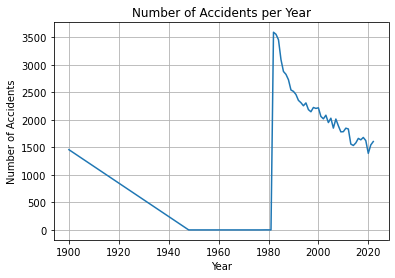

In [22]:
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

The above graph shows the occurence of aircraft accidents from . The year 1980 recorded the highest number of accidents while the year 2020 recorded the lowest number of airplane accidents

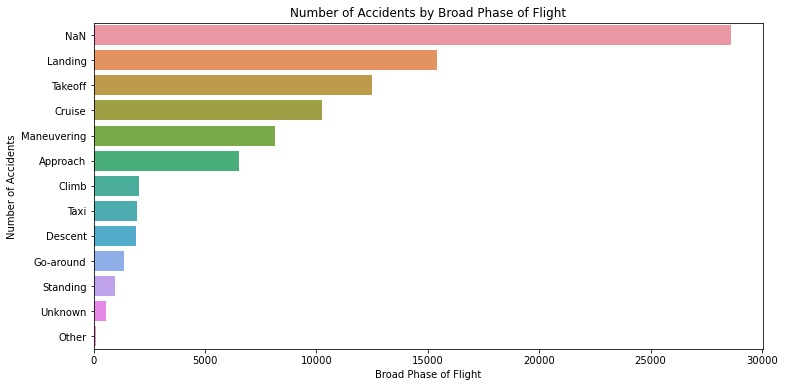

In [30]:
## plotting a bar graph of broad of phase of flight
plt.figure(figsize=(12, 6))
sns.countplot(data=aviation_df_2, y='Broad.phase.of.flight', order=aviation_df_2['Broad.phase.of.flight'].value_counts().index) 
plt.title('Number of Accidents by Broad Phase of Flight')
plt.xlabel('Number of accidents')
plt.ylabel('Broad phase of flight')
plt.show()

The above graphs shows that most of the accidents occured during the landing phase

In [32]:
top_makes = aviation_df_2['Make'].value_counts().nlargest(20).index
top_makes

Index(['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER', 'Bell', 'Boeing', 'NaN',
       'BOEING', 'Grumman', 'Mooney', 'BEECH', 'Robinson', 'Bellanca',
       'Hughes', 'Schweizer', 'Air Tractor', 'BELL', 'Mcdonnell Douglas',
       'Aeronca'],
      dtype='object')

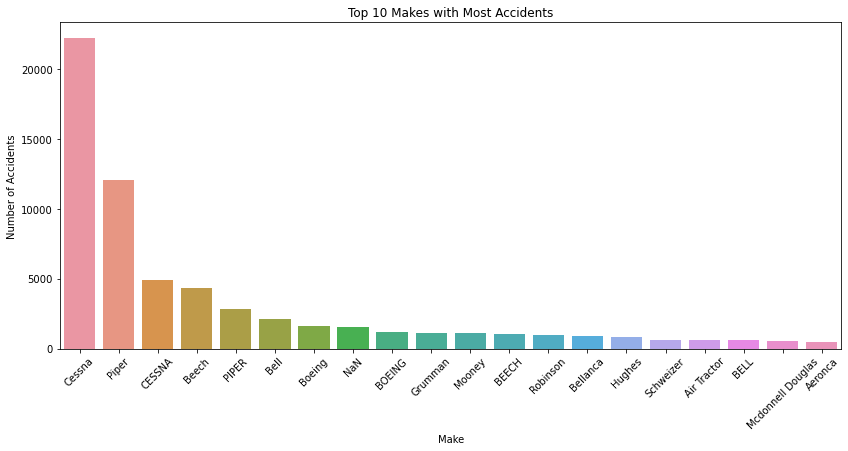

In [33]:
plt.figure(figsize=(14, 6))
sns.countplot(data=aviation_df_2[aviation_df_2['Make'].isin(top_makes)], x='Make', order=top_makes)
plt.title('Top 10 Makes with Most Accidents')
plt.xlabel('Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

The above graphs shows which airplane make had the highest number of accidents.The cessna Make having the highest number of accidents while Mcdonnells Douglas AAeronca having the least number of accidents